# Voted Across Demographics

Within this notebook we will conduct bivariate analysis for features which fall within the Demographics category within our dataset. Specifically, this notebook will examine the relationship of Demographic features on whether or not respondents Voted. Throughout this notebook we will be looking for any interesting correlations which might help us to explain whether a respondent voted and any obvious outlying or skewing features that may need to be removed when considering predictive analysis later.

While a thorough analysis is important to us there are many many significant correlations within this dataset and as such we have opted to limit the scope here by the Voted feature, Demographic category, and the top 10 most significant correlations within those two groups. That said, there is still much to cover so we have included a Key Insights section at the bottom of the notebook for convenience. Let's get started! First we will import the necessary tools and the data:

In [25]:
!pip install joblib

import pandas as pd
import numpy as np
import joblib
from scipy.stats import chi2_contingency
from time import time
import plotly
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as ipw
from ipywidgets import HBox, VBox,Label
import matplotlib.pyplot as plt
%matplotlib inline

This is a pickled form of our preprocessed data. It is important to note that his dataset contains both the original ungrouped observations and our grouped observations. For our purposes we will use the grouped observations we created.

In [26]:
data = joblib.load ('GroupedAndUngroupedData.pkl')

This is a function we created to make generating Heat Maps between two features easier:

In [27]:
def ShowTwoWayHeatmap (df, row, col, normalize = False):
    """
    Little function to help with creation of heatmaps.
    @params:
        df                  - required - dataframe containing data to be mapped
        row                 - required - name of column in df to plot on the rows
        col                 - required - name of column in df to plot on the columns
        normalize           - optional - specifies whether the table should be normalized along 'index', 'column', 'all' (or True), or neither (False)
    """
    ctab = pd.crosstab (data[row], data[col], normalize = normalize)
    if normalize:
        mult = 100
        fmt = '%.2f%%'
    else:
        mult = 1
        fmt = '%.0f'
    fig = plt.figure()
    fig.set_size_inches(13,6)
    heatmap = plt.pcolor(ctab)
    for y in range (ctab.shape[0]):
        for x in range (ctab.shape[1]):
            plt.text (x + 0.5, y + 0.5, fmt % (ctab.iloc[y,x] * mult),
                       ha='center', va='center')
    plt.yticks(np.arange(len (ctab.index))+0.5, ctab.index)
    plt.xticks(np.arange(len (ctab.columns))+0.5, ctab.columns, rotation=90)
    plt.colorbar(heatmap)
    plt.title(f'{row} vs {col}')
    plt.xlabel(col)
    plt.ylabel(row)
    plt.show()

# Subsetting And Choosing Features 

Given that our data consists almost entirely of categorical features we have opted to utilize the Chi-Squared method to bring out any significant correlations between those features as a means of narrowing analysis. The most significant aspect of this Chi-Squared analysis is the p value generated from it. For the purposes of this analysis we have chosen an alpha of .05, so as long as p value correlation between two given variables is less than .05 we will consider that correlation significant. However, our initial Chi-Squared analysis yielded over 10,000 significant correlations. We determined that we needed to narrow the scope of our analysis further by choosing specific features (voted in this case) and look at those features through the top 10 correlations for each of our categories. What follows is the processes of subsetting and feature selections used for this process.

This is a previously created dataset which contains the results of the Chi-Squared test across each feature of the dataset by category:

In [28]:
results = joblib.load ('Chi2Results.pkl')

Now, in order to focus strictly on the Voted feature we will subset the above data to include only those feature combinations for which one of them (in this case the 'Y') is pyVoted_Groups (the name of the Voted feature).

In [29]:
Votedresults=results[results['Y'].isin(['pyVoted_Groups'])].sort_values('p')

#Votedresults

Here we will ensure that the 'X' category is set to Demographics so that what remains are demographic features compared only to the Voted feature.  It is also important to note that this data frame will be sorted by the p value which is already in ascending order. Since the lower p value the better, the resulting dataframe should show us the top ten correlations when called for.

In [30]:
DemoVotedresults=Votedresults[Votedresults['XCategory'].isin(['Demographics'])].sort_values('p')

DemoVotedresults.head(10)

,XCategory,YCategory,X,Y,chi2,p,dof,expected,observed,comparison
3995,Demographics,PoliticalEngagement,USAEducation_Groups,pyVoted_Groups,154.728894,7.781428e-23,20,pyVoted_Groups no offline ...,pyVoted_Groups no offline online USAE...,XValue YValue observedVal ...
3530,Demographics,PoliticalEngagement,internetAccessCafeKiosk,pyVoted_Groups,40.997360,1.251804e-09,2,pyVoted_Groups no offline ...,pyVoted_Groups no offline online ...,XValue YValue observedVal expectedVal ...
3840,Demographics,PoliticalEngagement,internetAccessWork,pyVoted_Groups,38.887134,3.595557e-09,2,pyVoted_Groups no offline ...,pyVoted_Groups no offline online inter...,XValue YValue observedVal expectedVal ...
3468,Demographics,PoliticalEngagement,age_Groups,pyVoted_Groups,39.993433,4.568706e-07,6,pyVoted_Groups no offline onl...,pyVoted_Groups no offline online age_Group...,XValue YValue observedVal expectedV...
3778,Demographics,PoliticalEngagement,internetAccessSetting_Groups,pyVoted_Groups,47.651816,1.500896e-05,14,pyVoted_Groups no o...,pyVoted_Groups no offline on...,XValue YValue observedVal expecte...
3592,Demographics,PoliticalEngagement,internetAccessLibrary,pyVoted_Groups,21.191328,2.502429e-05,2,pyVoted_Groups no offline ...,pyVoted_Groups no offline online in...,XValue YValue observedVal expectedVal ...
3871,Demographics,PoliticalEngagement,langSpokenHome_Groups,pyVoted_Groups,22.751508,1.419530e-04,4,pyVoted_Groups no offline ...,pyVoted_Groups no offline online la...,XValue YValue observedVal expectedVal ...
4150,Demographics,PoliticalEngagement,USAWhite,pyVoted_Groups,12.798689,1.662647e-03,2,pyVoted_Groups no offline on...,pyVoted_Groups no offline online USAWhite ...,XValue YValue observedVal expectedVal ...
3716,Demographics,PoliticalEngagement,internetAccessOwnHome,pyVoted_Groups,12.418773,2.010471e-03,2,pyVoted_Groups no offline ...,pyVoted_Groups no offline online in...,XValue YValue observedVal expectedVal ...
3654,Demographics,PoliticalEngagement,internetAccessNone,pyVoted_Groups,11.350468,3.429867e-03,2,pyVoted_Groups no offline ...,pyVoted_Groups no offline online inter...,XValue YValue observedVal expectedVal ...


The following plot provides a fairly straight forward visual representation of the relevant feature combinations. There are two important things to understand about his plot. First, remember that lower p values are better for this purpose so the darker the color the better. Second, you will notice that most of the p values here are <.05 which should serve to further the decision to focus our investigation in the way we chose to.

In [31]:
fig = px.scatter(DemoVotedresults, x="Y", y="X", color="p",
                 hover_name="X", size_max=60)
fig.update_xaxes(type='category')
fig.show()

Utilizing the dataframe and visualization above we will start to perform bivariate analysis. 

# Bivariate Analysis

We now move to performing our bivariate analysis for the selected features as they relate to voting. For the purposes of this analysis two primary visualizations will be created for each selected feature: Heat Maps and Histograms. The primary reason for the selection of these two forms of visualizations is that our features are all categorical which limits our options but these two visualizations will still provide us with great insights into the distribution of the data. 

In the spirit of understanding the distribution of the selected features the visualizations we generate will show different forms of that distribution for the sake of coverage. Heat Maps will show counts and histograms will show percentages between categories and those who voted and did not vote. Importantly, you will notice that some of the visualizations generated are not included in this list. This is done because the features involved are related to the question at hand (they fall under that same question on the original survey) and require further exploration. 

We have grouped the relevant features into subcategories which relate to the question from which the selected features originate within the survey. At the end of each subsection there will be a brief discussion of the insights we take from the distributions displayed.

# Voted vs Education Groups

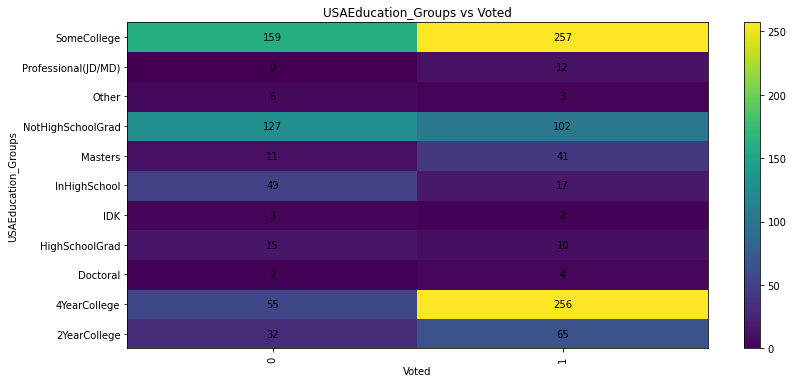

In [32]:
color_discrete_map={0: "#EF553B", 1: "#636EFA"}#create a color mapping for consistency throughout visualization

ShowTwoWayHeatmap(data,'USAEducation_Groups','Voted', normalize=False)

fig = px.histogram(data, x="USAEducation_Groups",color='Voted',
                   category_orders=dict(USAEducation_Groups=["IDK", "Other", "NotHighSchoolGrad", "InHighSchool","HighSchoolGrad","SomeCollege","2YearCollege",'4YearCollege',"Masters","Professional(JD/MD)",'Doctoral']),
                   barnorm='percent',
                  color_discrete_map=color_discrete_map)
fig.update_layout(barmode='group',yaxis_title="Percent")
#fig.update_yaxes(type='log')
fig.show()

Insights:

Significant correlation between Some College and 4 year college seems to exist, though it also appears that most of the observations are in these two categories so there may be some skew.

There is a clear delineation between those who have Some College and above and the likelihood of voting. The same is true for Highschool Grad and below and the likelihood not to vote. However, again there appears to be significantly fewer people in the High School Grad and below category.

# Voted vs Internet Access 

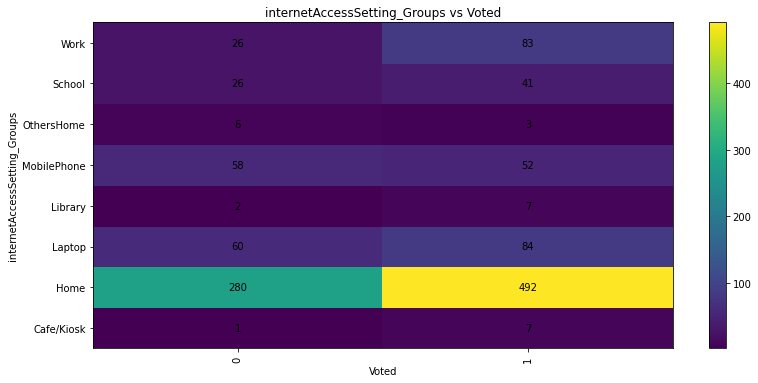

In [33]:
ShowTwoWayHeatmap(data,'internetAccessSetting_Groups','Voted', normalize=False)

fig=px.histogram(data, x='internetAccessSetting_Groups',color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

Insights:

Internet Access via Mobile Phone and Others Home are more likely not to Vote than to Vote. This to me indicates a wealth disparity, most of the rest of the setting would imply having sufficient financing to have things like a home, laptop, or job that allows use of the internet on the clock (Work category).

It should also be noted that there are some very low value counts for a number of categories which may skew predictive capability outside of this set of respondents.



# Voted vs Age Group

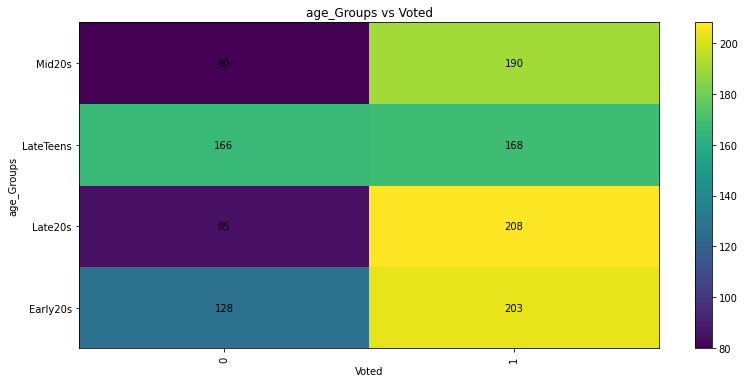

In [44]:
ShowTwoWayHeatmap(data,'age_Groups','Voted', normalize=False)

fig = px.histogram(data, x="age_Groups",color='Voted',
                   category_orders=dict(age_Groups=["LateTeens", "Early20s", "Mid20s", "Late20s"]),barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")
#fig.update_yaxes(type='log')
fig.show()

Insights:

Fairly even distributions though the data clearly leans toward mid to late 20s in volume.

It seems respondents were more likely to vote as they got old which seems consistent with traditional understanding.


# Voted vs Language Spoken at Home

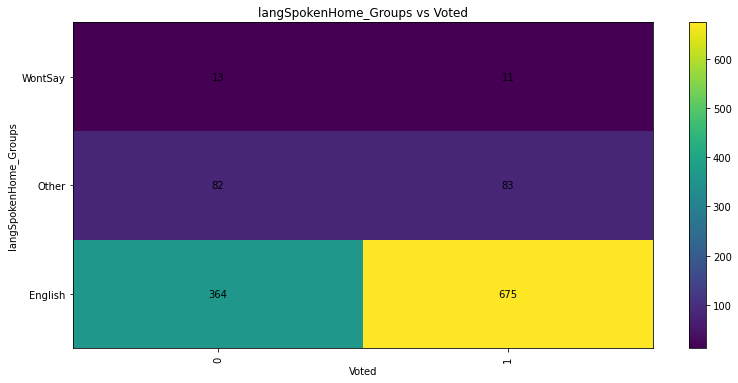

In [45]:
ShowTwoWayHeatmap(data,'langSpokenHome_Groups','Voted', normalize=False)

fig = px.histogram(data, x="langSpokenHome_Groups",color='Voted',barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")
#fig.update_yaxes(type='log')
fig.show()

Insights:

We ought to consider removing this category for predictive modeling due to the skew toward english speaking respondents. The vast majority of respondents indicated they speak english and, since p values would indicate that there is a significance between voting and english speaking, this may skew predictive capacity when trying to generalize outside this data set.

# Voted vs Ethnicity

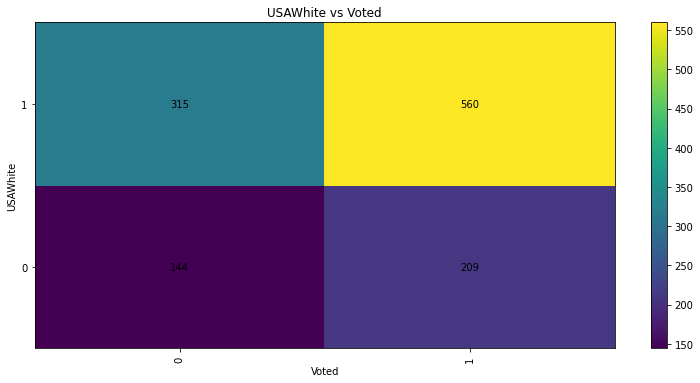

In [46]:
ShowTwoWayHeatmap(data,'USAWhite','Voted', normalize=False)

fig=px.histogram(data[data['USAWhite']==1], x="USAWhite",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

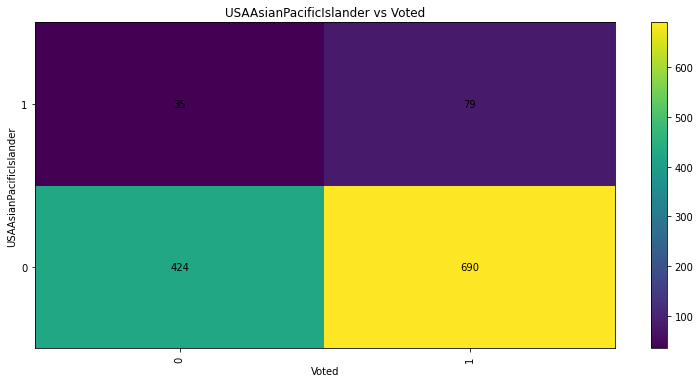

In [47]:
ShowTwoWayHeatmap(data,'USAAsianPacificIslander','Voted', normalize=False)

fig=px.histogram(data[data['USAAsianPacificIslander']==1], x="USAAsianPacificIslander",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

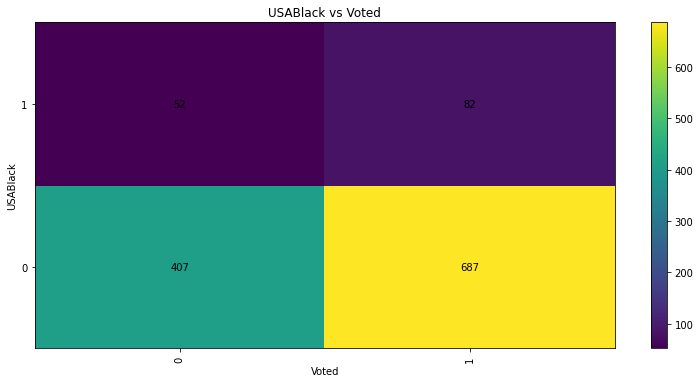

In [48]:
ShowTwoWayHeatmap(data,'USABlack','Voted', normalize=False)

fig=px.histogram(data[data['USABlack']==1], x="USABlack",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

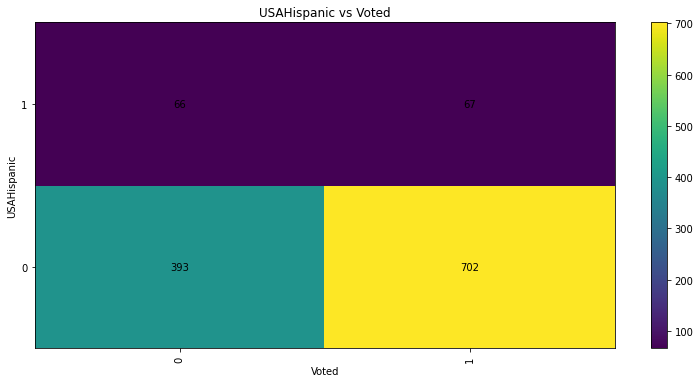

In [49]:
ShowTwoWayHeatmap(data,'USAHispanic','Voted', normalize=False)

fig=px.histogram(data[data['USAHispanic']==1], x="USAHispanic",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

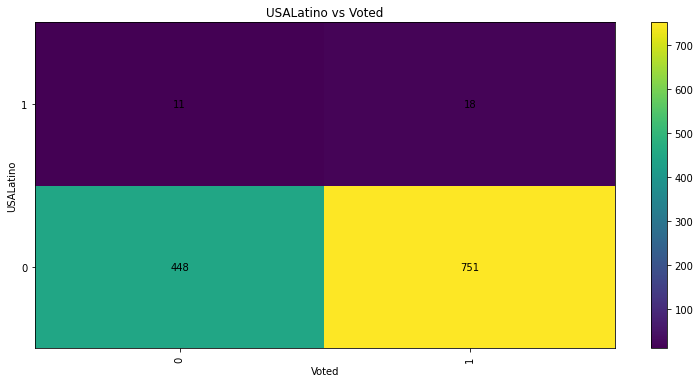

In [50]:
ShowTwoWayHeatmap(data,'USALatino','Voted', normalize=False)

fig=px.histogram(data[data['USALatino']==1], x="USALatino",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

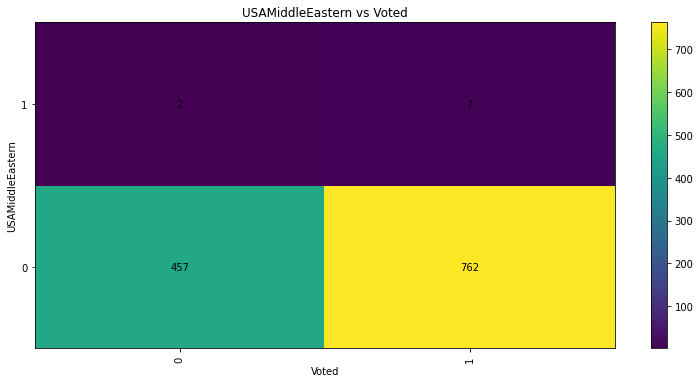

In [51]:
ShowTwoWayHeatmap(data,'USAMiddleEastern','Voted', normalize=False)

fig=px.histogram(data[data['USAMiddleEastern']==1], x="USAMiddleEastern",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

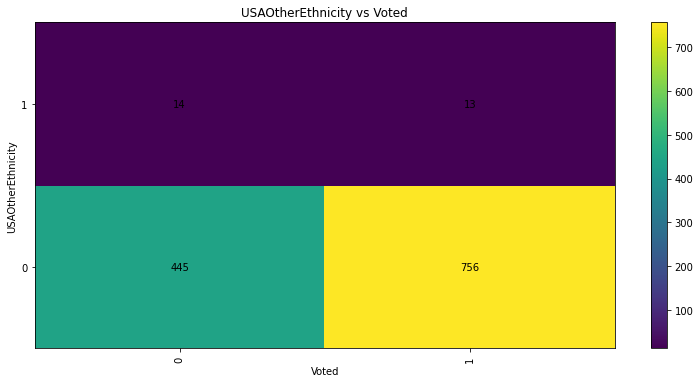

In [52]:
ShowTwoWayHeatmap(data,'USAOtherEthnicity','Voted', normalize=False)

fig=px.histogram(data[data['USAOtherEthnicity']==1], x="USAOtherEthnicity",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

Insights:
    
Another subsection we should consider removing for predictive modeling due to skew. This makes identifying with other very ethnicities have a probability of voting/not voting look significant when it may not be if properly sampled.

# Voted vs Gender

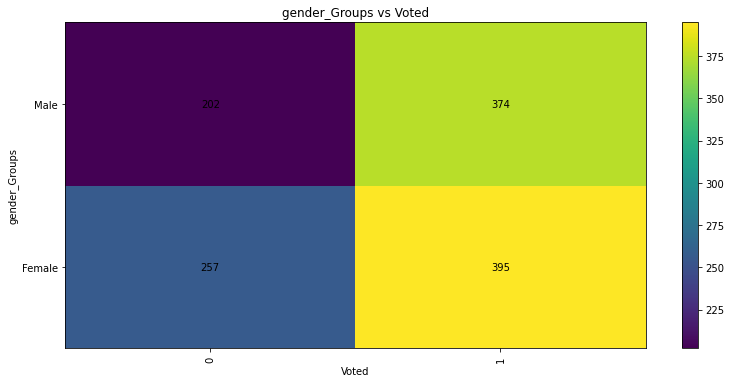

In [53]:
ShowTwoWayHeatmap(data,'gender_Groups','Voted', normalize=False)

fig=px.histogram(data, x="gender_Groups",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

Insights:
    
Evenly distributed, though males slightly more likely to vote than females.

# Voted vs Area Type

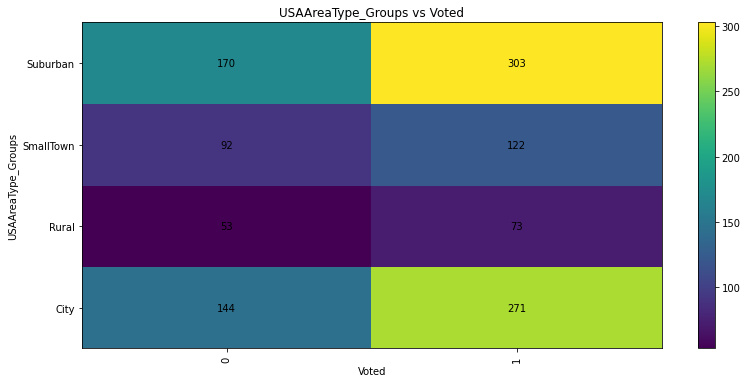

In [54]:
ShowTwoWayHeatmap(data,'USAAreaType_Groups','Voted', normalize=False)

fig=px.histogram(data, x="USAAreaType_Groups",color='Voted',color_discrete_map=color_discrete_map,barnorm='percent')
fig.update_layout(barmode='group',yaxis_title="Percent")

Insights:

This distribution is pretty evenly distributed all things considered. Though suburban is the largest category.

One interesting thing here is that it seems that the voting/not voting ratio gets closer to 60/40 the larger the distribution which would coincide with what we know about voting trends nationally.

# Key Insights

<u>Voted Vs Education Groups:</u>

Significant correlation between Some College and 4 year college seems to exist, though it also appears that most of the observations are in these two categories so there may be some skew.

There is a clear delineation between those who have Some College and above and the likelihood of voting. The same is true for Highschool Grad and below and the likelihood not to vote. However, again there appears to be significantly fewer people in the High School Grad and below category.

<u>Voted vs Internet Access:</u>

Internet Access via Mobile Phone and Others Home are more likely not to Vote than to Vote. This to me indicates a wealth disparity, most of the rest of the setting would imply having sufficient financing to have things like a home, laptop, or job that allows use of the internet on the clock (Work category).

It should also be noted that there are some very low value counts for a number of categories which may skew predictive capability outside of this set of respondents.

<u>Voted vs Age Group:</u>

Fairly even distributions though the data clearly leans toward mid to late 20s in volume.

It seems respondents were more likely to vote as they got old which seems consistent with traditional understanding.

<u>Voted vs Language Spoken at Home:</u>

We ought to consider removing this category for predictive modeling due to the skew toward english speaking respondents. The vast majority of respondents indicated they speak english and, since p values would indicate that there is a significance between voting and english speaking, this may skew predictive capacity when trying to generalize outside this data set.

<u>Voted vs Ethnicity:</u>

Another subsection we should consider removing for predictive modeling due to skew. This makes identifying with other very ethnicities have a probability of voting/not voting look significant when it may not be if properly sampled.

<u>Voted vs Gender:</u>

Evenly distributed, though males slightly more likely to vote than females.

<u>Voted vs Area Type:</u>

This distribution is pretty evenly distributed all things considered. Though suburban is the largest category.

One interesting thing here is that it seems that the voting/not voting ratio gets closer to 60/40 the larger the distribution which would coincide with what we know about voting trends nationally.